In [2]:
import numpy as np
import matplotlib.pyplot as plt

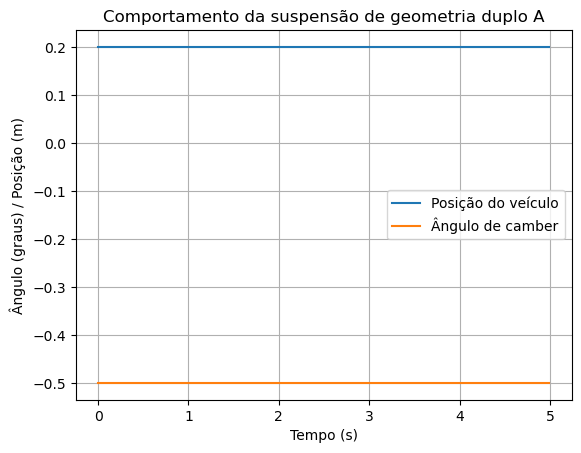

In [3]:


class DoubleASuspensionSimulator:
    def __init__(self, mass, spring_constant, damping_coefficient, wheel_mass, wheel_radius, initial_position, initial_velocity):
        self.mass = mass
        self.spring_constant = spring_constant
        self.damping_coefficient = damping_coefficient
        self.wheel_mass = wheel_mass
        self.wheel_radius = wheel_radius
        self.position = initial_position
        self.velocity = initial_velocity
        self.wheel_position = initial_position
        self.wheel_velocity = initial_velocity

        # Parâmetros de geometria da suspensão
        self.wheelbase = 2.5  # Distância entre eixos (mz)
        self.track_width = 1.5  # Largura da trilha (m)
        self.static_camber = -0.5  # Camber estático da roda (graus)

    def calculate_spring_force(self):
        suspension_travel = self.position - self.wheel_position
        return -self.spring_constant * suspension_travel

    def calculate_damping_force(self):
        suspension_velocity = self.velocity - self.wheel_velocity
        return -self.damping_coefficient * suspension_velocity

    def calculate_camber(self):
        # Ângulo de camber varia com o movimento vertical da suspensão
        camber_change = (self.position - self.wheel_position) / self.wheelbase
        return self.static_camber + np.degrees(np.arctan(camber_change))

    def step(self, dt):
        spring_force = self.calculate_spring_force()
        damping_force = self.calculate_damping_force()

        # Equações de movimento do sistema de suspensão
        total_force = spring_force + damping_force
        acceleration = total_force / self.mass
        self.velocity += acceleration * dt
        self.position += self.velocity * dt

        # Equações de movimento da roda
        wheel_acceleration = (spring_force - damping_force) / self.wheel_mass
        self.wheel_velocity += wheel_acceleration * dt
        self.wheel_position += self.wheel_velocity * dt

    def simulate(self, time_steps, dt):
        positions = []
        cambers = []
        for _ in range(time_steps):
            positions.append(self.position)
            cambers.append(self.calculate_camber())
            self.step(dt)
        return positions, cambers

if __name__ == "__main__":
    # Parâmetros da suspensão
    vehicle_mass = 1500  # Massa do veículo (kg)
    spring_constant = 25000  # Constante da mola (N/m)
    damping_coefficient = 1200  # Coeficiente de amortecimento (N.s/m)
    wheel_mass = 30  # Massa da roda (kg)
    wheel_radius = 0.3  # Raio da roda (m)

    # Condições iniciais
    initial_position = 0.2  # Posição inicial do veículo (m)
    initial_velocity = 0  # Velocidade inicial do veículo (m/s)

    # Criar simulador de suspensão
    sim = DoubleASuspensionSimulator(vehicle_mass, spring_constant, damping_coefficient, wheel_mass, wheel_radius, initial_position, initial_velocity)

    # Simular o comportamento da suspensão por 5 segundos com intervalos de 0.01 segundos
    time_steps = 500
    dt = 0.01
    positions, cambers = sim.simulate(time_steps, dt)

    # Exibir os resultados
    time = [i * dt for i in range(time_steps)]
    plt.plot(time, positions, label="Posição do veículo")
    plt.plot(time, cambers, label="Ângulo de camber")
    plt.xlabel("Tempo (s)")
    plt.ylabel("Ângulo (graus) / Posição (m)")
    plt.title("Comportamento da suspensão de geometria duplo A")
    plt.grid(True)
    plt.legend()
    plt.show()
